In [2]:

import pandas as pd
import numpy as np 
import pandas as pd 
import re
import nltk 
from nltk import FreqDist

# run this one time
nltk.download('stopwords') 
nltk.download('vader_lexicon')
nltk.download('punkt')

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
global str
import re
import spacy
import gensim
from gensim import corpora

# Libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:\\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print(df)


list(df)

df.info()
df.shape


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ryans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ryans\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                        id             dateAdded           dateUpdated  \
0     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
...                    ...                   ...                   ...   
4995  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4996  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4997  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4998  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4999  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   

                                                   name       asins   brand  \
0     Amazon Kindle E-Reader 6" 

(5000, 24)

In [3]:

# Find percentage of missing data points
# If some arbitray number of data points are missing, let's say over 50%, we won't use this feature
df_missing = df.isna()
df_num_missing = df_missing.sum()
sr = df_num_missing.sort_values(ascending = False)
print(sr / len(df))
print(sr / len(df) * 100)

# These fields have over 70% missing values:
# reviews.dateAdded
# reviews.id 
# any field with more than 70% missing values will be pretty much useless for our analysis
# anyway, this seems fine, and it is only an ID field and a dateAdded field


reviews.id             0.9942
reviews.dateAdded      0.7896
reviews.title          0.0026
sourceURLs             0.0000
keys                   0.0000
dateAdded              0.0000
dateUpdated            0.0000
name                   0.0000
asins                  0.0000
brand                  0.0000
categories             0.0000
primaryCategories      0.0000
imageURLs              0.0000
manufacturerNumber     0.0000
manufacturer           0.0000
reviews.username       0.0000
reviews.date           0.0000
reviews.dateSeen       0.0000
reviews.doRecommend    0.0000
reviews.numHelpful     0.0000
reviews.rating         0.0000
reviews.sourceURLs     0.0000
reviews.text           0.0000
id                     0.0000
dtype: float64
reviews.id             99.42
reviews.dateAdded      78.96
reviews.title           0.26
sourceURLs              0.00
keys                    0.00
dateAdded               0.00
dateUpdated             0.00
name                    0.00
asins                   0.00
bran

In [4]:

# Let's experiment with some sentiment analysis concepts
# First we need to clean up the stuff in the independent field of the DF we are workign with
df.replace('\'','', regex=True, inplace=True) 
df['review_title'] = df[['reviews.title']].astype(str)
df['review_text'] = df[['reviews.text']].astype(str)
df['review_title'] = df['reviews.title'].str.replace('\d+', '')
df['review_text'] = df['reviews.text'].str.replace('\d+', '')


# Get rid of special characters
df['review_title'] = df['reviews.title'].str.replace(r'[^\w\s]+', '')
df['review_text'] = df['reviews.text'].str.replace(r'[^\w\s]+', '')

# Get rid of double spaces
df['review_title'] = df['reviews.title'].str.replace(r'\^[a-zA-Z]\s+', '')
df['review_text'] = df['reviews.text'].str.replace(r'\^[a-zA-Z]\s+', '')

# Convert all case to lower
df['review_title'] = df['reviews.title'].str.lower()
df['review_text'] = df['reviews.text'].str.lower()


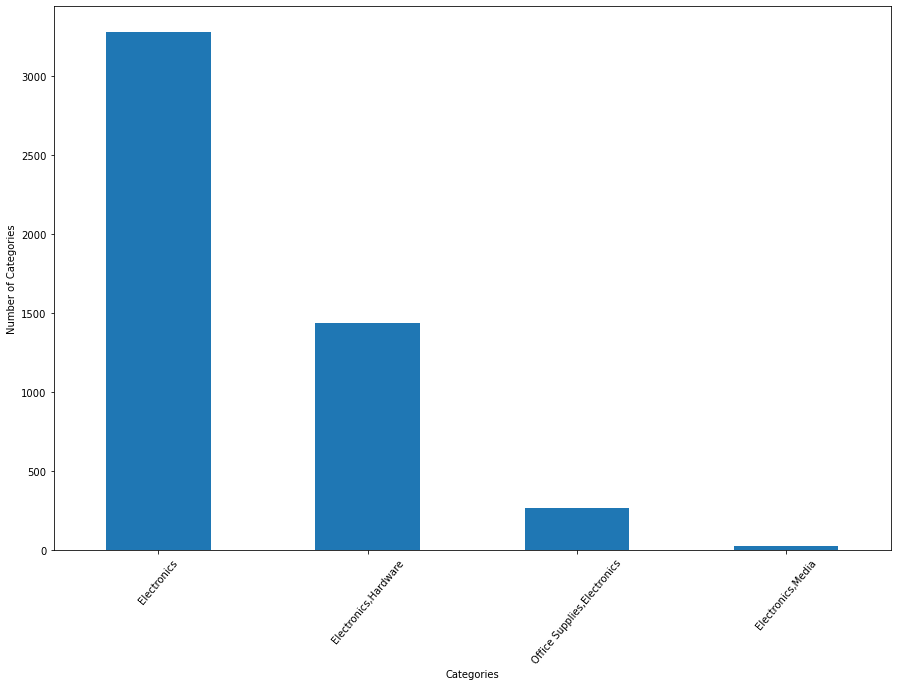

In [5]:

# Let's do some exploratory data analysis
# We can plot counts of items in one column to get a visual clue about what's going on
categories = df.groupby("primaryCategories")
plt.figure(figsize=(15,10))
categories.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Categories")
plt.ylabel("Number of Categories")
plt.show()


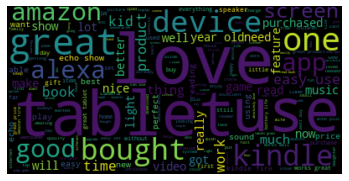

In [6]:

# Let's check out results of a wordcloud to view frequencies of word occurrances
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(' '.join(df['review_text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


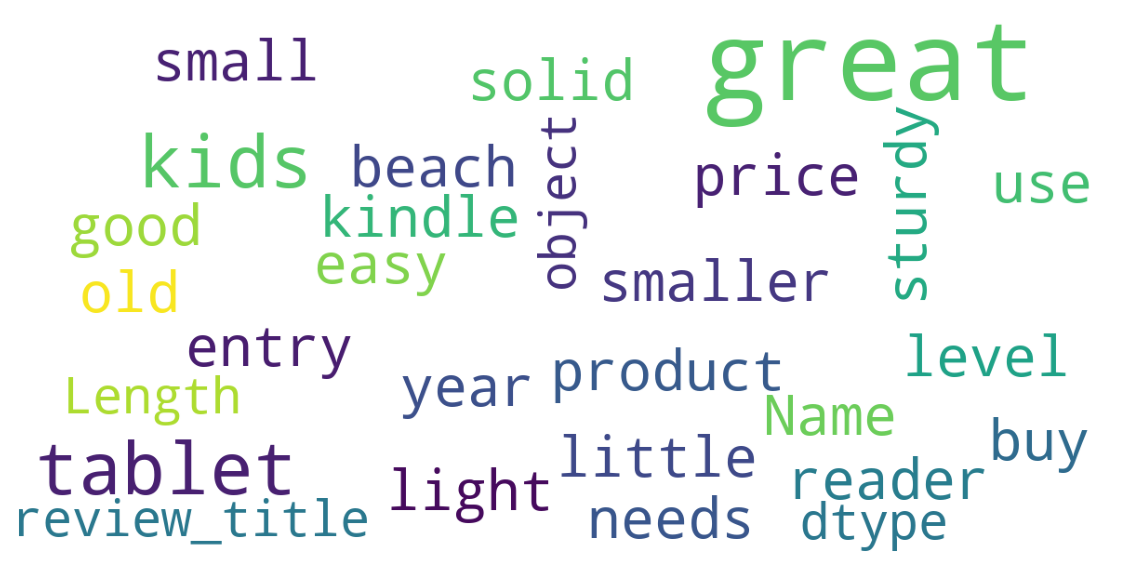

In [7]:

# Let's check out another word cloud, based on a different field in the dataframe and 
# Apply different formatting for a different effect
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
# Print wordcloud
show_wordcloud(df["review_title"])


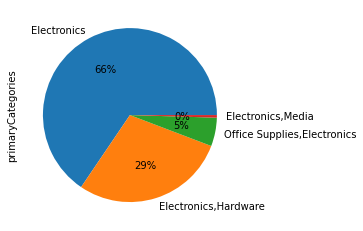

In [8]:

# Perhaps a pie chart would look more appealing and be more useful too
# Get top 10 categories; plotting all would give too many <1% of total and chart look wacky
s = df['primaryCategories'].value_counts().nlargest(10)
s.plot(kind='pie', autopct='%1.0f%%')


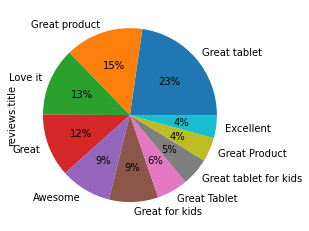

In [9]:

# Get top 10 reviews
s = df['reviews.title'].value_counts().nlargest(10)
s.plot(kind='pie', autopct='%1.0f%%')


In [11]:

# Get 25 most common words in review_title
reviews_list = df['review_title'].tolist()
from collections import Counter 
Counter = Counter(reviews_list) 
most_occur = Counter.most_common(25) 
print(most_occur)


[('great tablet', 166), ('great product', 124), ('love it', 88), ('great', 73), ('great for kids', 61), ('awesome', 56), ('great tablet for kids', 37), ('good product', 29), ('excellent', 28), ('easy to use', 27), ('great device', 25), ('love it!', 25), ('good', 24), ('great gift', 23), ('works great', 21), ('great!', 20), ('great tablet for the price', 19), ('love my kindle', 18), ('great item', 18), ('love alexa', 16), ('great buy', 16), ('echo plus', 16), ('great kindle', 16), ('echo show', 15), ('nice tablet', 15)]


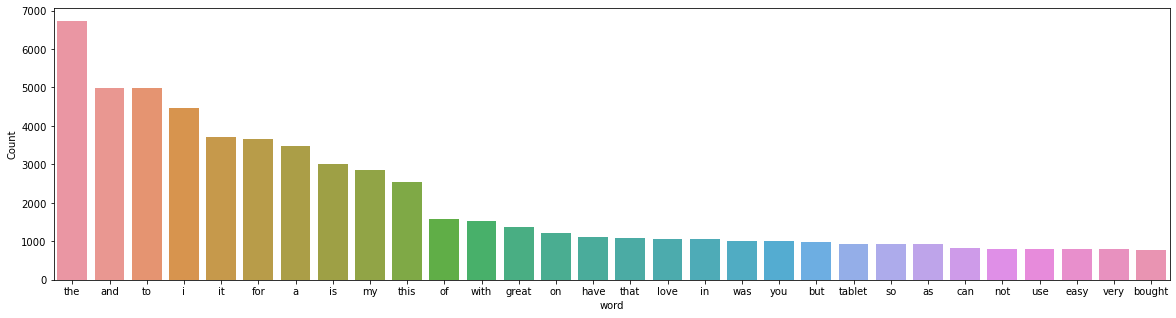

In [12]:

# Let's look at some more options for plotting/charting our data
# Function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()
  
freq_words(df['review_text'])


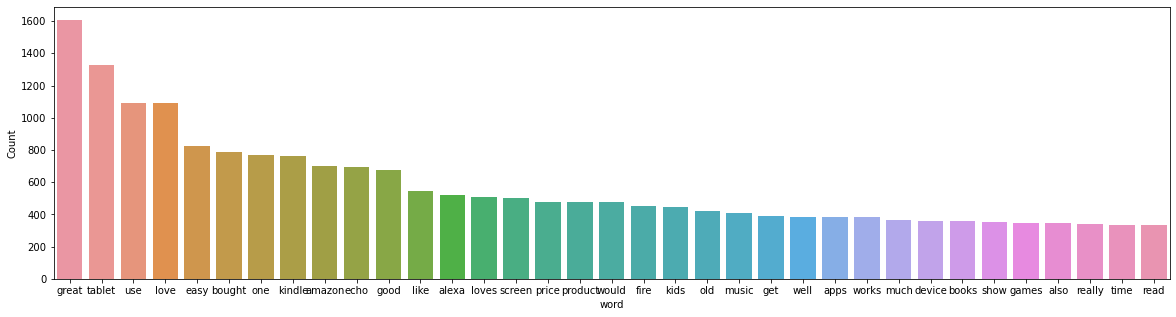

In [13]:

# Remove (mostly) meaningless words, like 'the', 'and', 'to', etc., etc., etc. 
# Remove unwanted characters, numbers and symbols
df['review_text'] = df['review_text'].str.replace("[^a-zA-Z#]", " ")

# Let’s try to remove the stopwords and short words (<2 letters) from the reviews.
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# Remove short words (length < 3)
df['review_text'] = df['review_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# Remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['review_text']]

# Make entire text lowercase
reviews = [r.lower() for r in reviews]

# Let’s again plot the most frequent words and see if the more significant words have come out.
freq_words(reviews, 35)


In [14]:

# Tf-idf is a very common technique for determining roughly what each document in a set of 
# documents is “about”. It cleverly accomplishes this by looking at two simple metrics: tf 
# (term frequency) and idf (inverse document frequency). Term frequency is the proportion 
# of occurrences of a specific term to total number of terms in a document. Inverse document 
# frequency is the inverse of the proportion of documents that contain that word/phrase. 
# Simple, right!? The general idea is that if a specific phrase appears a lot of times in a 
# given document, but it doesn’t appear in many other documents, then we have a good idea 
# that the phrase is important in distinguishing that document from all the others. 
# Starting with the CountVectorizer/TfidfTransformer approach...
# convert fields in datframe to list


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,2))
cvec

# Calculate all the n-grams found in all documents
from itertools import islice
cvec.fit(df['review_text'])
list(islice(cvec.vocabulary_.items(), 20))

len(cvec.vocabulary_)


42332

In [15]:

# Let’s take a moment to describe these parameters as they are the primary levers for adjusting what 
# feature set we end up with. First is “min_df” or mimimum document frequency. This sets the minimum 
# number of documents that any term is contained in. This can either be an integer which sets the 
# number specifically, or a decimal between 0 and 1 which is interpreted as a percentage of all documents. 
# Next is 'max_df' which similarly controls the maximum number of documents any term can be found in. 
# If 90% of documents contain the word “spork” then it’s so common that it’s not very useful.
# Initialize the vectorizer with new settings and check the new vocabulary length
cvec = CountVectorizer(stop_words='english', min_df=.0025, max_df=.5, ngram_range=(1,2))
cvec.fit(df['review_text'])
len(cvec.vocabulary_)


1041

In [16]:

# Our next move is to transform the document into a “bag of words” representation which essentially is 
# just a separate column for each term containing the count within each document. After that, we’ll 
# take a look at the sparsity of this representation which lets us know how many nonzero values there 
# are in the dataset. The more sparse the data is the more challenging it will be to model
cvec_counts = cvec.transform(df['review_text'])
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))


sparse matrix shape: (5000, 1041)
nonzero count: 58486
sparsity: 1.12%


In [17]:

# Get counts of frequently occurring terms; top 20
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)


,term,occurrences
375,great,1607
886,tablet,1325
960,use,1092
542,love,1092
255,easy,826
100,bought,786
471,kindle,765
31,amazon,700
263,echo,693
353,good,676


In [18]:

# Now that we’ve got term counts for each document we can use the TfidfTransformer to calculate the 
# weights for each term in each document 
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights


# We can take a look at the top 20 terms by average tf-idf weight.
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)


,term,weight
375,great,0.046096
886,tablet,0.039319
542,love,0.036973
960,use,0.033976
255,easy,0.030041
100,bought,0.027052
353,good,0.025806
471,kindle,0.024784
557,loves,0.022245
263,echo,0.022218


In [19]:

# Above, we looked at the results of the CountVectorizer. Now we are looking at the analytics of the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=.0025, max_df=.5, stop_words='english')
tvec_weights = tvec.fit_transform(df['review_text'])
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)


,term,weight
295,great,0.054380
684,tablet,0.045646
415,love,0.042672
740,use,0.039751
201,easy,0.035786
72,bought,0.030986
285,good,0.029216
360,kindle,0.027606
417,loves,0.026784
549,product,0.024821


In [20]:

# NLP enables the computer to interact with humans in a natural manner. It helps the computer 
# to understand the human language and derive meaning from it. Althought the process is quite powerful
# it definitely is NOT perfect. We will achieve a certain probability of accuracy.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['review_text'])


In [21]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['reviews.rating'], test_size=0.3, random_state=1)


# Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
# Around 70% accurate. Can this be improved upon?


MultinomialNB Accuracy: 0.7033333333333334


In [22]:

# Now we can instantiate the models. Let's try using two classifiers, a Support Vector Classifier and a 
# K-Nearest Neighbors Classifier:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

# Now let's fit the classifiers:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

# The call has trained the model, so now we can predict and store the prediction in a variable:

SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

# We should now evaluate how the classifier performed. There are multiple methods of evaluating a 
# classifier's performance, 
# and you can read more about there different methods below.
# In Scikit-Learn you just pass in the predictions against the ground truth labels which were stored 
# in your test labels:
# Accuracy score is the simplest way to evaluate
print('SVC_prediction Accuracy:',accuracy_score(SVC_prediction, y_test))
print('KNN_prediction Accuracy:',accuracy_score(KNN_prediction, y_test))


SVC_prediction Accuracy: 0.7106666666666667
KNN_prediction Accuracy: 0.676


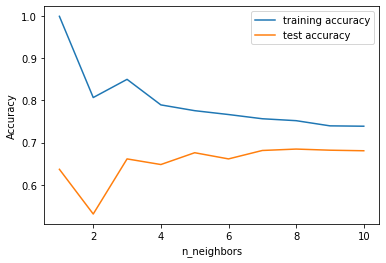

In [23]:

# Now, we are getting around 70% accuracy (SVC) and a slightly worse 68% accuracy (KNN).  
# We ran enough experiments.  We can stop here and move on to something else.
# Let's look at a plot of taining accuracy vs testing accuracy.
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')


In [24]:

# Latent Dirichlet Allocation (LDA)
# The LDA is based upon two general assumptions:
#   Documents that have similar words usually have the same topic
#   Documents that have groups of words frequently occurring together usually have the same topic.
# These assumptions make sense because the documents that have the same topic, for instance, Business topics will have words like the "economy", "profit", "the stock market", "loss", etc. The second assumption states that if these words frequently occur together in multiple documents, those documents may belong to the same category.
# Mathematically, the above two assumptions can be represented as:
#   Documents are probability distributions over latent topics
#   Topics are probability distributions over words

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(df['review_text'].values.astype('U'))


from sklearn.decomposition import NMF
nmf = NMF(n_components=10, random_state=42)
nmf.fit(doc_term_matrix )


import random
for i in range(10):
    random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
    print(tfidf_vect.get_feature_names()[random_id])


scrolls
smallest
awkward
accurate
mothers
seen
installed
geared
shape
touching


In [25]:

first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:]
for i in top_topic_words:
    print(tfidf_vect.get_feature_names()[i])
    

nice
games
does
just
need
perfect
price
apps
amazon
tablet


In [26]:

# We can see that in each of these topics, the top words describe the text in the 'body' pretty well:shoes, shirts, hair care products, etc.
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')
    

Top 10 words for topic #0:
['nice', 'games', 'does', 'just', 'need', 'perfect', 'price', 'apps', 'amazon', 'tablet']


Top 10 words for topic #1:
['got', 'absolutely', 'wife', 'son', 'grandson', 'christmas', 'daughter', 'gift', 'bought', 'loves']


Top 10 words for topic #2:
['recommend', 'fast', 'fun', 'navigate', 'super', 'setup', 'product', 'set', 'use', 'easy']


Top 10 words for topic #3:
['screen', 'sound', 'smart', 'like', 'plus', 'home', 'amazon', 'music', 'alexa', 'echo']


Top 10 words for topic #4:
['battery', 'value', 'gift', 'sound', 'buy', 'recommend', 'price', 'works', 'product', 'great']


Top 10 words for topic #5:
['absolutely', 'second', 'just', 'grandkids', 'bought', 'new', 'alexa', 'got', 'awesome', 'love']


Top 10 words for topic #6:
['best', 'light', 'new', 'size', 'like', 'screen', 'reading', 'read', 'books', 'kindle']


Top 10 words for topic #7:
['battery', 'excellent', 'recommend', 'nice', 'sound', 'pretty', 'quality', 'product', 'price', 'good']


Top 10 wo

In [27]:

# Here we are doing some sentiment analysis, and distilling the 'review_text' field into positive, neutral, or negative, 
# based on the tone of the text in each record.  Also, we are filtering out the records that have <.2 negative score; 
# keeping only those that have >.2 negative score. This is interesting, but this can contain some non-intitive results.  
# For instance, one record in 'review_text' literally says 'no issues'.  This is probably positive, but the algo sees the
# word 'no' and interprets the comment as negative.  I would argue that it's positive.  We'll circle back and resolve 
# this potential issue a little later.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['review_text'].apply(lambda x: sid.polarity_scores(x))
def convert(x):
    if x < 0:
        return "negative"
    elif x > .2:
        return "positive"
    else:
        return "neutral"
df['result'] = df['sentiment'].apply(lambda x:convert(x['compound']))
df['result']


0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
4995    positive
4996    positive
4997    positive
4998     neutral
4999    negative
Name: result, Length: 5000, dtype: object

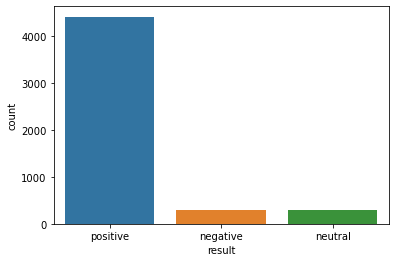

In [29]:

# Plot results of sentiment analysis
ax = sns.countplot(x="result", data=df)


In [30]:

features = df['review_text']
labels = df['reviews.rating']


# Uses the 2500 most frequently occurring words to create a bag of words feature vector. 
# Words that occur less frequently are not very useful for classification.
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=1, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(features).toarray()


# Convert the data into the numeric form. 
X = TfidfVectorizer().fit_transform(features)
y = LabelEncoder().fit_transform(labels)


In [31]:

# As the last step before we train our algorithms, we need to divide our data into training and testing 
# sets. The training set # will be used to train the algorithm while the test set will be used to 
# evaluate the performance of the machine learning model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [32]:

# The sklearn.ensemble module contains the RandomForestClassifier class that can be used to train the 
# machine learning model using the random forest algorithm. To do so, we need to call the fit method 
# on the RandomForestClassifier class and pass it our training features and labels, as parameters.
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)


# Once the model has been trained, the last step is to make predictions on the model. To do so, 
# we need to call the predict method on the object of the RandomForestClassifier class that we used for training. 
predictions = text_classifier.predict(X_test)
predictions


array([4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       3, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [33]:

# Finally, to evaluate the performance of the machine learning models, we can use classification 
# metrics such as a confusion metrix, F1 measure, accuracy, etc.
# To find the values for these metrics, we can use classification_report, confusion_matrix, and 
# accuracy_score utilities from the sklearn.metrics library. 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))
# now we have ana accuracy of around 73%.  


[[  3   0   0   0   3]
 [  0   0   0   3   7]
 [  0   0   7   4  30]
 [  0   0   0  58 214]
 [  0   0   0  11 660]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.00      0.00      0.00        10
           2       1.00      0.17      0.29        41
           3       0.76      0.21      0.33       272
           4       0.72      0.98      0.83       671

    accuracy                           0.73      1000
   macro avg       0.70      0.37      0.42      1000
weighted avg       0.74      0.73      0.67      1000

0.728


In [ ]:
# Of course, at this point, there are so many more things we can do with so many other NLP concepts.  
# Nevertheless, we'll wrap it up here.  This experiment was not meant to be comprehensive or exhaustive, 
# but rather to demonstrate some popular concepts, and illustrate how easy it is to execute NLP techniques
# and to showcase the overall potential of Python, including it's ease of use.

In [ ]:
# Data Source:
# https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products
